In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,290020,0,0,76561198382837840,9,3,1,6.3,"July 8, 2021",->This game is best for those who love to prog...
1,290020,1,0,76561198852444247,38,1,1,15.8,"June 27, 2021","As electronic engineer, I approved this game, ..."
2,290020,0,0,FrankWuggles,671,11,1,8.4,"June 15, 2021",Incredible game... like being back in school w...
3,290020,1,1,76561199167698647,47,1,1,3.5,"May 15, 2021","I tried building a robot, but instead I got my..."
4,290020,0,0,witchpoet,41,1,1,100.3,"February 19, 2021",INTELLECTUALLY CHALLENGING


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,6.3,"July 8, 2021",->This game is best for those who love to prog...
1,1,0,1,15.8,"June 27, 2021","As electronic engineer, I approved this game, ..."
2,0,0,1,8.4,"June 15, 2021",Incredible game... like being back in school w...
3,1,1,1,3.5,"May 15, 2021","I tried building a robot, but instead I got my..."
4,0,0,1,100.3,"February 19, 2021",INTELLECTUALLY CHALLENGING


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,6.3,1
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,15.8,1
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,8.4,1
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,3.5,1
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,100.3,1
5,"January 24, 2021","Horrible game. Terrible GUI, drains battery li...",0,0,5.0,-1
6,"January 14, 2021",This is a phenomenal digital logic circuit tra...,0,0,13.1,1
7,"May 2, 2020",I love the ease of constructing the 'bot' and ...,5,0,11.9,1
8,"April 13, 2020",I came back to play this one when I got back w...,1,1,42.4,1
9,"February 7, 2020",A very cool thinking game. Almost like playin...,1,0,10.7,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  122 non-null    object 
 1   Review_Text     122 non-null    object 
 2   Num_Helpful     122 non-null    int64  
 3   Num_Funny       122 non-null    int64  
 4   Hours_Played    122 non-null    float64
 5   Recommend       122 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.8+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6204/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,6.3,1,1625702400
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,15.8,1,1624752000
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,8.4,1,1623715200
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,3.5,1,1621036800
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,100.3,1,1613692800


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6204/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,6.3,1,1625702400,2688
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,15.8,1,1624752000,2686
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,8.4,1,1623715200,2684
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,3.5,1,1621036800,2680
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,100.3,1,1613692800,2668


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,6.3,1,1625702400,2688
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,15.8,1,1624752000,2686
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,8.4,1,1623715200,2684
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,3.5,1,1621036800,2680
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,100.3,1,1613692800,2668


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2688,"July 8, 2021",->This game is best for those who love to prog...
1,2686,"June 27, 2021","As electronic engineer, I approved this game, ..."
2,2684,"June 15, 2021",Incredible game... like being back in school w...
3,2680,"May 15, 2021","I tried building a robot, but instead I got my..."
4,2668,"February 19, 2021",INTELLECTUALLY CHALLENGING


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2333,"September 22, 2014",3
1,2333,"September 23, 2014",3
2,2334,"September 28, 2014",6
3,2334,"September 29, 2014",3
4,2335,"October 3, 2014",3
...,...,...,...
85,2668,"February 19, 2021",1
86,2680,"May 15, 2021",1
87,2684,"June 15, 2021",1
88,2686,"June 27, 2021",1


<AxesSubplot:>

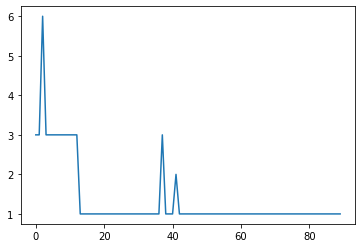

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

122

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.3555555555555556

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2333,6
1,2334,9
2,2335,12
3,2336,3
4,2337,3
...,...,...
68,2668,1
69,2680,1
70,2684,1
71,2686,1


<AxesSubplot:>

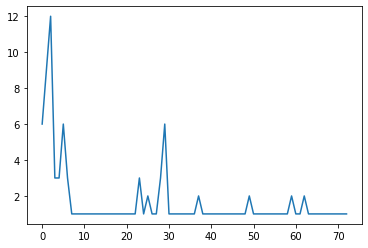

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

122

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

1.6712328767123288

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,6.3,1,1625702400,2688
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,15.8,1,1624752000,2686
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,8.4,1,1623715200,2684
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,3.5,1,1621036800,2680
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,100.3,1,1613692800,2668


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2333,261
1,2334,741
2,2335,81
3,2336,12
4,2337,12
...,...,...
68,2668,0
69,2680,1
70,2684,0
71,2686,1


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2333,67,20,43.5,43.500000
2334,205,9,33.0,82.333333
2335,17,2,4.0,6.750000
2336,4,4,4.0,4.000000
2337,4,4,4.0,4.000000
...,...,...,...,...
2668,0,0,0.0,0.000000
2680,1,1,1.0,1.000000
2684,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1606

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

13.163934426229508

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2333,6
1,2334,135
2,2335,0
3,2336,0
4,2337,0
...,...,...
68,2668,0
69,2680,1
70,2684,0
71,2686,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2333,1,1,1.0,1.0
2334,45,0,0.0,15.0
2335,0,0,0.0,0.0
2336,0,0,0.0,0.0
2337,0,0,0.0,0.0
...,...,...,...,...
2668,0,0,0.0,0.0
2680,1,1,1.0,1.0
2684,0,0,0.0,0.0


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

189

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

1.5491803278688525

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2333,234.3
1,2334,173.7
2,2335,258.0
3,2336,31.8
4,2337,28.2
...,...,...
68,2668,100.3
69,2680,3.5
70,2684,8.4
71,2686,15.8


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2333,52.0,26.1,39.05,39.05
2334,28.2,13.0,16.70,19.30
2335,61.5,2.4,11.05,21.50
2336,10.6,10.6,10.60,10.60
2337,9.4,9.4,9.40,9.40
...,...,...,...,...
2668,100.3,100.3,100.30,100.30
2680,3.5,3.5,3.50,3.50
2684,8.4,8.4,8.40,8.40


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

2787.0

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

22.844262295081965

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2333,1.0
1,2334,1.0
2,2335,1.0
3,2336,1.0
4,2337,1.0
...,...,...
68,2668,1.0
69,2680,1.0
70,2684,1.0
71,2686,1.0


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2333,1,1,1.0,1.0
2334,1,1,1.0,1.0
2335,1,1,1.0,1.0
2336,1,1,1.0,1.0
2337,1,1,1.0,1.0
...,...,...,...,...
2668,1,1,1.0,1.0
2680,1,1,1.0,1.0
2684,1,1,1.0,1.0


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

82

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.6721311475409836

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,6.3,1,1625702400,2688
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,15.8,1,1624752000,2686
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,8.4,1,1623715200,2684
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,3.5,1,1621036800,2680
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,100.3,1,1613692800,2668


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,0.036903,1.0,1.000000,2688
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,0.094374,1.0,0.995566,2686
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,0.049607,1.0,0.990730,2684
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,0.019964,1.0,0.978235,2680
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,0.605566,1.0,0.943974,2668
...,...,...,...,...,...,...,...,...
117,"September 29, 2014",This game is one of a kind. and it does everyt...,9,0,0.169389,1.0,0.002821,2334
118,"September 28, 2014",If you want to tinker with robots but don't ha...,205,45,0.099819,1.0,0.002418,2334
119,"September 28, 2014",First off I been on Steam for a really long ti...,33,0,0.077435,1.0,0.002418,2334
120,"September 23, 2014","Nice game, exactly what i wanted.After a first...",20,1,0.313370,1.0,0.000403,2333


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6204/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"July 8, 2021",->This game is best for those who love to prog...,0,0,0.036903,1.0,1.000000,2688
1,"June 27, 2021","As electronic engineer, I approved this game, ...",1,0,0.094374,1.0,0.995566,2686
2,"June 15, 2021",Incredible game... like being back in school w...,0,0,0.049607,1.0,0.990730,2684
3,"May 15, 2021","I tried building a robot, but instead I got my...",1,1,0.019964,1.0,0.978235,2680
4,"February 19, 2021",INTELLECTUALLY CHALLENGING,0,0,0.605566,1.0,0.943974,2668
5,"January 24, 2021","Horrible game. Terrible GUI, drains battery li...",0,0,0.029038,0.0,0.933495,2664
6,"January 14, 2021",This is a phenomenal digital logic circuit tra...,0,0,0.078040,1.0,0.929464,2663
7,"May 2, 2020",I love the ease of constructing the 'bot' and ...,5,0,0.070780,1.0,0.825877,2626
8,"April 13, 2020",I came back to play this one when I got back w...,1,1,0.255293,1.0,0.818218,2623
9,"February 7, 2020",A very cool thinking game. Almost like playin...,1,0,0.063521,1.0,0.791616,2614


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2333    [Nice game, exactly what i wanted.After a firs...
2334    [This game is one of a kind. and it does every...
2335    [The following review was written long ago dur...
2336    [Good game, best played alone with little to n...
2337    [What an incredibly fun and addictive game! If...
2338    [This is one of the best simulation games that...
2339    [At first 20 seemed too much for this game, be...
2347    [This is a better program than I expected, wor...
2348       [This is one the best robot simulators. 10/10]
2351    [Great game. An interesting challenge to desig...
2355    [Logic bots is a good game with interesting co...
2362    [great game! can be tricky at times with the c...
2373    [I'd advise you to view the announcements page...
2375    [It's still getting updates. I love that I can...
2376    [Warning: Do not get this game... If you have ...
2390    [######Update##############Leaving the origina...
2395    [Working good... I know a lot of my students w..

In [52]:
# storing data in JSON format
df_text_list.to_json('logicbots_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('logicbots_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2333  [Nice game, exactly what i wanted.After a firs...
1   Review_Text   2334  [This game is one of a kind. and it does every...
2   Review_Text   2335  [The following review was written long ago dur...
3   Review_Text   2336  [Good game, best played alone with little to n...
4   Review_Text   2337  [What an incredibly fun and addictive game! If...
5   Review_Text   2338  [This is one of the best simulation games that...
6   Review_Text   2339  [At first 20 seemed too much for this game, be...
7   Review_Text   2347  [This is a better program than I expected, wor...
8   Review_Text   2348     [This is one the best robot simulators. 10/10]
9   Review_Text   2351  [Great game. An interesting challenge to desig...
10  Review_Text   2355  [Logic bots is a good game with interesting co...
11  Review_Text   2362  [great game! can be tricky at times with the c...
12  Review_Text   2373  [I'd advise yo

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('logicbots_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6204/2427243994.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('logicbots_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6204/385733745.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('logicbots_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])